In [1]:
import numpy as np
from collections import Counter

In [2]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [3]:
def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

In [4]:
training_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]
training_labels = ['A', 'A', 'A', 'B', 'B']
test_point = [4, 5]
k = 3

In [5]:
prediction = knn_predict(training_data, training_labels, test_point, k)
print(prediction)

A


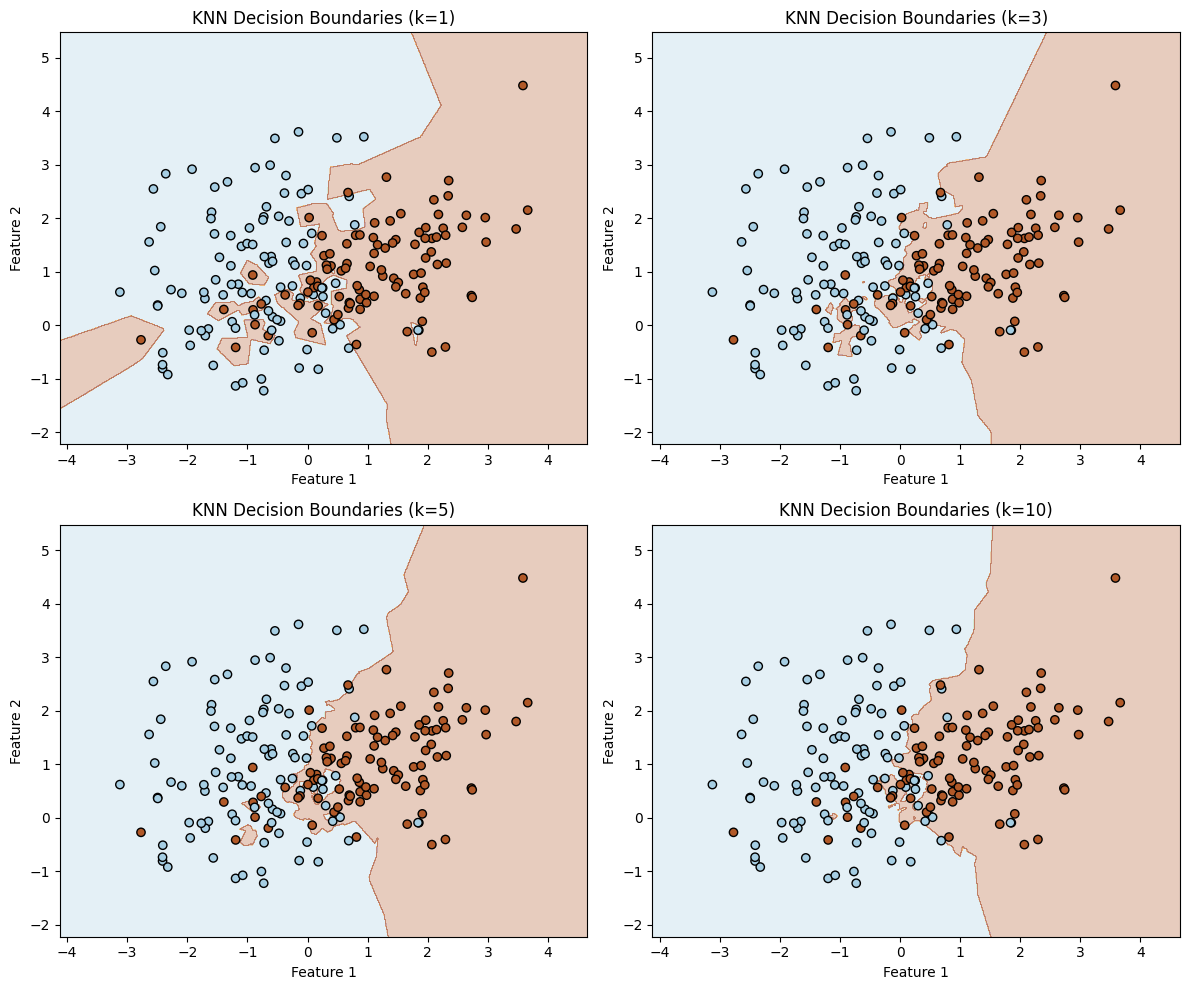

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
k_values = [1, 3, 5, 10]

for ax, k in zip(axs.flat, k_values):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k',
               cmap=plt.cm.Paired, marker='o')
    ax.set_title(f'KNN Decision Boundaries (k={k})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()
